# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [199]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
employee = pd.read_csv("Employee.csv")

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
display(employee.groupby("Department")[["Salary"]].mean()) # With .groupby

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [8]:
employee.pivot_table(index="Department")[["Salary"]]

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [14]:
display(employee.pivot_table(index=["Department","Title"])[["Salary"]])

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [19]:
employee.pivot_table(index="Title",columns="Years")

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [40]:
emp_and_sal = employee.pivot_table(index=["Department","Title"],aggfunc= {"Salary" : "mean" , "Name":"count"})
emp_and_sal.columns = ["Numb of employees","Avg Salary"]
display(emp_and_sal)


Numb of employees  Avg Salary
Department Title                                   
HR         VP                         1        70.0
           analyst                    2        32.5
IT         VP                         1        70.0
           analyst                    2        32.5
           associate                  1        60.0
Sales      associate                  2        55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [55]:
datos = employee.pivot_table(index=["Department","Title"],aggfunc={"Salary":["median",min,max,np.std]})
display(datos)
"""Donde esta dando NAN es porque hay un solo valor y me imagino que para calcular la std esta diviendo entre n-1 
que para esos caso seria 0 lo cual es una indeterminacion, donde da 0 es porque las personas del dpto
ganan lo mismo"""

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

'Donde esta dando NAN es porque hay un solo valor y me imagino que para calcular la std esta diviendo entre n-1 \nque para esos caso seria 0 lo cual es una indeterminacion, donde da 0 es porque las personas del dpto\nganan lo mismo'

#### Based on your comments, fill the missing values with an appropriate value

In [57]:
datos.fillna(0) # Nan puede valer 0 ya que la desviacion estandar de 1 solo numero es 0, no hay dispersion. 

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0  0.000000
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0  0.000000
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0  0.000000
Sales      associate   55.0   55.0  55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [63]:
data2 = employee.pivot_table(index="Department",aggfunc={"Name":"count","Salary":sum})
data2.columns=["Number of employees","Total salary spent"]
display(data2)

,Number of employees,Total salary spent
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [69]:
data3 = employee.pivot_table(index=["Department","Title"],aggfunc={"Years":"sum",'Salary':"mean"})
display(data3)

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [193]:
# Defino mi tabla inicial con la que trabajare 
data4 = employee.pivot_table(index=["Department","Salary"],aggfunc={"Salary":"mean"})

# Creo una lista unica de los departamentos sobre la que voy a iterar 
departamentos = employee["Department"].unique()
deps = []
nuevas_medias = []

# Creo un loop q me devuelve para cada departamento los valores que no son el maximo
for dep in departamentos:
    cuadro = data4.loc[dep]["Salary"]
    filtrado = cuadro.apply(lambda x: False if x== max(cuadro) else True)
    
    # Agrego el departamento a una lista
    deps.append(dep)
    
    # agrego la nueva media (sin el valor maximo) a una lista
    nuevas_medias.append(cuadro[filtrado].mean())

# construyo un nuevo dataframe con las listas anteriores 
resp = pd.DataFrame(pd.Series(deps))
resp["New Means"] = nuevas_medias
resp.columns = ["Departments","New Means"]
resp

,Departments,New Means
0,IT,41.666667
1,HR,32.500000
2,Sales,NaN


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [194]:
fitbit = pd.read_csv("Fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [195]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [196]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [202]:
fitbit["Minutes Very Active"].corr(fitbit["Steps"]) # Existe una correlacion pero no es excesivamente fuerte. 

0.5714518481062607

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

Text(0, 0.5, 'Steps')

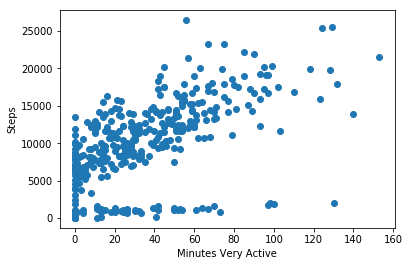

In [207]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel("Minutes Very Active")
plt.ylabel("Steps")

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# Se ve que existe una relacion positiva, pero no del todo fuerte, para la mayoria de los puntos observamos q 
# a medida que aumentan los minutos de actividad, los steps suelen aumentar tambien. 
# Vemos que hay una buena cantidad de puntos en los que aumenta la actividad y no los steps, eso debe ser 
# algun ejercicio q no involucra dar pasos... similarmente vemos q hay una columna donde minutos de act es 0 
# y q los steps aumetan, eso a lo mejor es porque la pulsera lee como subir muchos steps al montarse en un ascensor

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [208]:
fitbit["Minutes Sedentary"].corr(fitbit["Steps"]) # No existe relacion lineal. 

0.0769060806299009

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

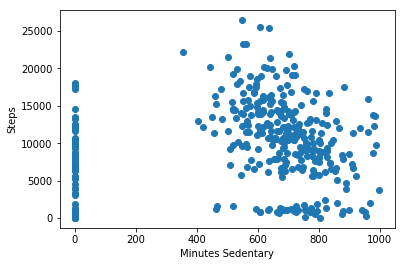

In [210]:
_=plt.scatter(x=fitbit["Minutes Sedentary"],y=fitbit["Steps"])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Steps")

In [22]:
# No se aprecia ningun tipo de relacion lineal en el grafico. 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [211]:
fitbit["MinutesOfSleep"].corr(fitbit["Steps"]) # No existe relacion lineal. 


0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

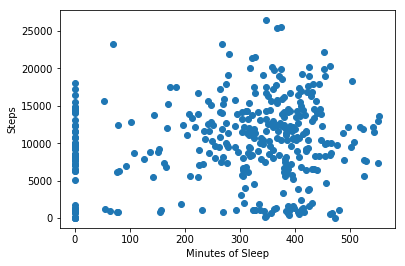

In [213]:
your_=plt.scatter(x=fitbit["MinutesOfSleep"],y=fitbit["Steps"])
plt.xlabel("Minutes of Sleep")
plt.ylabel("Steps") 

# No parece existir ninguna relacion lineal entre las variables. 

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [216]:
cor_fit = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()

In [217]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [219]:
cor_fit["Steps"].sort_values(ascending=False) # Minutes Very Active es la que mayor corr tiene (0.57)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [221]:
time_grades = pd.read_csv("Time_Grades.csv")

In [222]:
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1127a1400>,
      dtype=object)

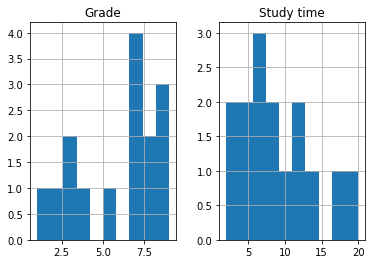

In [224]:
vis = time_grades.hist()
vis

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [225]:
# Pearson
time_grades["Grade"].corr(time_grades["Study time"]) # 0.8 es una correlacion bastante fuerte, asi q si. 

0.7980456073578859

In [226]:
time_grades["Grade"].corr(time_grades["Study time"],method="spearman") # 0.8 es una correlacion bastante fuerte, asi q si. 

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

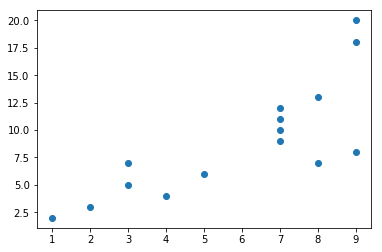

In [227]:
plt.scatter(x=time_grades['Grade'],y=time_grades["Study time"])

In [34]:
# Se ve una correlacion positiva bastante fuerte. Ambas crecen y decrecer juntas de forma general. 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
# Pearson es una medida de correlacion LINEAL mientras que Spearman no. El coeficiente de correlacion de Pearson
# es mas susceptible a valores extremos que el de Spearman, ya que spearman solo mide la direccion del movimiento
# no la magnitud. 